In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import pylab

In [2]:
# read HR-Employee-Attrition file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt", sep='\t')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# drop the columns not required and create new Data set
to_drop = ['BusinessTravel', 'DailyRate', 'DistanceFromHome','EmployeeCount',
          'EmployeeNumber', 'JobLevel', 'MonthlyIncome','MonthlyRate',
          'NumCompaniesWorked', 'Over18','PercentSalaryHike', 'PerformanceRating',
          'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
          'YearsInCurrentRole']
cdf = df.drop(to_drop, axis = 1)
cdf



,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,No,10,3,10,1,7
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,Yes,8,3,8,3,0
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,No,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,No,17,3,5,0,3
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,No,9,3,7,1,7
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,Yes,6,3,6,0,3
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,No,17,2,9,0,8


In [4]:
pop1 = df[df["Attrition"] == "Yes"]
pop2 = df[df["Attrition"] == "No"]

st.ttest_ind(pop1.Age, pop2.Age)

Ttest_indResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10)

In [5]:
st.ttest_ind(pop1.Education, pop2.Education)

Ttest_indResult(statistic=-1.2026255155085892, pvalue=0.22931520332230415)

In [6]:
st.ttest_ind(pop1.EnvironmentSatisfaction, pop2.EnvironmentSatisfaction)

Ttest_indResult(statistic=-3.9818600026818496, pvalue=7.17233854936886e-05)

In [7]:
st.ttest_ind(pop1.HourlyRate, pop2.HourlyRate)

Ttest_indResult(statistic=-0.26228987349264493, pvalue=0.7931347689944243)

In [8]:
st.ttest_ind(pop1.JobInvolvement, pop2.JobInvolvement)

Ttest_indResult(statistic=-5.024140228583729, pvalue=5.677065356745289e-07)

In [9]:
st.ttest_ind(pop1.JobSatisfaction, pop2.JobSatisfaction)

Ttest_indResult(statistic=-3.9862267630568273, pvalue=7.04306674173115e-05)

In [10]:
st.ttest_ind(pop1.TotalWorkingYears, pop2.TotalWorkingYears)

Ttest_indResult(statistic=-6.6522546135024445, pvalue=4.0618781112668525e-11)

In [11]:
st.ttest_ind(pop1.WorkLifeBalance, pop2.WorkLifeBalance)

Ttest_indResult(statistic=-2.4548148934297767, pvalue=0.014211054989021308)

In [12]:
st.ttest_ind(pop1.YearsAtCompany, pop2.YearsAtCompany)

Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)

In [13]:
st.ttest_ind(pop1.YearsSinceLastPromotion, pop2.YearsSinceLastPromotion)

Ttest_indResult(statistic=-1.2657876620135298, pvalue=0.2057899591624936)

In [14]:
st.ttest_ind(pop1.YearsWithCurrManager, pop2.YearsWithCurrManager)

Ttest_indResult(statistic=-6.059068531868998, pvalue=1.7369867845242207e-09)

In [15]:
dep1 = df.groupby('Department').Attrition.count()
education_field1 = df.groupby('Attrition').EducationField.count()

gender1 = df.groupby('Attrition').Gender.count()
jobrole1 = df.groupby('Attrition').JobRole.count()
maritalstatus1 = df.groupby('Attrition').MaritalStatus.count()
overtime1 = df.groupby('Attrition').OverTime.count()

pd.DataFrame({"count": education_field1})



,count
Attrition,
No,1233
Yes,237


In [16]:
#count for males,females, based on Attrition


gender1 = df.groupby(['Gender', 'Attrition', 'EducationField']).Attrition.count()


gender1 

Gender  Attrition  EducationField  
Female  No         Human Resources       5
                   Life Sciences       202
                   Marketing            54
                   Medical             171
                   Other                27
                   Technical Degree     42
        Yes        Human Resources       3
                   Life Sciences        38
                   Marketing            15
                   Medical              19
                   Other                 2
                   Technical Degree     10
Male    No         Human Resources      15
                   Life Sciences       315
                   Marketing            70
                   Medical             230
                   Other                44
                   Technical Degree     58
        Yes        Human Resources       4
                   Life Sciences        51
                   Marketing            20
                   Medical              44
                  

In [30]:
#figure out how to do it 

gender_df= df.groupby('Gender').Attrition.count()
gender_df = gender_df.reset_index()
gender1

,Gender,Attrition
0,Female,588
1,Male,882


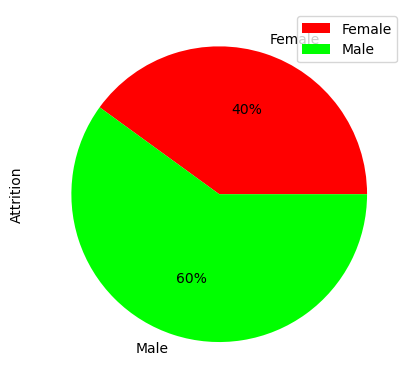

In [35]:

# make pie-chart

labels = gender_df['Gender']

colors = ["red", "lime"]

gender_pie= gender_df.plot(kind = 'pie', 
           y = "Attrition", 
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)
    
